![alt text](https://storage.googleapis.com/kaggle-competitions/kaggle/5048/media/output_DEb8oT.gif)

## Project: Distracted driver detection and classification using deep convolutional neural networks

## Description: 
This project aims to develop a machine learning system that can detect and classify different distracted states of car drivers. The main approach is to apply deep convolutional neural networks (CNNs). We will explore and experiment various CNN architectures, leveraged pre-trained networks (learning transfer), psuedo labelling, and potentially an emsenbles of several models to find the best classification. Results of this project may be used to further research and applied to as a part of an on-car online monitoring system where computer will decide to take-over control of the car if the driver is distracted and poses a potential accident.

## Data
Data is a collection of 10 different states of drivers containing one safe driving and 9 other distracted modes. The dataset is provided by State Farm through Kaggle which can be downloaded from [here](https://www.kaggle.com/c/state-farm-distracted-driver-detection/data). Data exploration and preprocessing will be described in details in subsequent sections.

## Analysis
Data exploration, preprocessing and analy will be conducted in great details to gain as much information about the dataset as possible. All steps of a machine learning pipeline are included and a summary is provided at the end of each section.

## Tools

The project utilizes the following dependencies:

- Python 3.5: Tensorflow, Keras, Numpy, Scipy
- NVIDIA Geforce GTX960 GPU, CUDA, CuDNN

Check GPU device availability.

# 1. Import dependencies


In [0]:
!pip install kaggle-cli --upgrade
!pip install bcolz

     |████████████████████████████████| 81kB 1.5MB/s 
     |████████████████████████████████| 5.3MB 3.7MB/s 
     |████████████████████████████████| 112kB 36.3MB/s 
     |████████████████████████████████| 112kB 33.1MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
  Created wheel for kaggle-cli: filename=kaggle_cli-0.12.13-cp36-none-any.whl size=9488 sha256=24c57e6faa27674a0f1f411b56d9ade1bf6235b1e7beaf2b60f135ebd29bdc9c
  Stored in directory: /root/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Created wheel for pyperclip: filename=pyperclip-1.8.0-cp36-none-any.whl size=8693 sha256=d43ad81120326e04e42b4df23590de29db793abbc1b0a87ea1109797d5b21456
  Stored in directory: /root/.cache/pip/wheels/b2/ac/0a/b784f0afe26eaf52e88a7e15c7369090deea0354fa1c6fc689
Successfully built kaggle-cli pyperclip
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: progressbar

In [0]:
import math, os, sys
import pickle
from glob import glob
import numpy as np
from numpy.random import random, permutation, randn, normal
from matplotlib import pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
import bcolz
from shutil import copyfile
from shutil import move

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input,  GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing import image
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_crossentropy
from keras.regularizers import l2,l1

Install CurlWget from chrome extension to install kaggle datasets.Firstly join kaggle competition by clicking join competition button.Click download all button in data folder and pause download option

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586458097&Signature=RWQl0UBfYc1fbWKHpRil5I0AvA2iVL%2Fcr%2Fb7hn9lp%2FwcGzhOsmeKy%2B8nMhqh%2BJwzizeVShvEC6jeIqxSwlBGWQKIt3VVit8VwTAWJUeT8h0Rxc0149gkYqPcGGatWOmbP3%2FAp3rxno%2FXsSbCNgCY7aImIvzszLIgzFhxnl%2BgVsSRkKw1qpZSsFDlLjsTe6diSF0h296AaLxddab3DQUqM6nvfVTAK1jWdsB3Ln04wHzw0kdqN9neUGliOcm2JmhvzXk8f3VN9kWiMeDUDvtU0T3bfd77tEa7a9obZ8ShxB8q9yPcqvlP0IAtYxYBaGB35%2F409URVubFwMqWTOl7JbQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dstate-farm-distracted-driver-detection.zip" -c -O 'state-farm-distracted-driver-detection.zip'

--2020-04-07 18:41:09--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1586458097&Signature=RWQl0UBfYc1fbWKHpRil5I0AvA2iVL%2Fcr%2Fb7hn9lp%2FwcGzhOsmeKy%2B8nMhqh%2BJwzizeVShvEC6jeIqxSwlBGWQKIt3VVit8VwTAWJUeT8h0Rxc0149gkYqPcGGatWOmbP3%2FAp3rxno%2FXsSbCNgCY7aImIvzszLIgzFhxnl%2BgVsSRkKw1qpZSsFDlLjsTe6diSF0h296AaLxddab3DQUqM6nvfVTAK1jWdsB3Ln04wHzw0kdqN9neUGliOcm2JmhvzXk8f3VN9kWiMeDUDvtU0T3bfd77tEa7a9obZ8ShxB8q9yPcqvlP0IAtYxYBaGB35%2F409URVubFwMqWTOl7JbQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dstate-farm-distracted-driver-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4296022692 (4.0G) [application/zip]
Saving to: ‘state-farm-distracted-driv

In [0]:
!unzip state-farm-distracted-driver-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/train/c7/img_56661.jpg  
  inflating: imgs/train/c7/img_56699.jpg  
  inflating: imgs/train/c7/img_56717.jpg  
  inflating: imgs/train/c7/img_56724.jpg  
  inflating: imgs/train/c7/img_56768.jpg  
  inflating: imgs/train/c7/img_56779.jpg  
  inflating: imgs/train/c7/img_56849.jpg  
  inflating: imgs/train/c7/img_56899.jpg  
  inflating: imgs/train/c7/img_56938.jpg  
  inflating: imgs/train/c7/img_5706.jpg  
  inflating: imgs/train/c7/img_57076.jpg  
  inflating: imgs/train/c7/img_57122.jpg  
  inflating: imgs/train/c7/img_57137.jpg  
  inflating: imgs/train/c7/img_5715.jpg  
  inflating: imgs/train/c7/img_57278.jpg  
  inflating: imgs/train/c7/img_57321.jpg  
  inflating: imgs/train/c7/img_57345.jpg  
  inflating: imgs/train/c7/img_57355.jpg  
  inflating: imgs/train/c7/img_5741.jpg  
  inflating: imgs/train/c7/img_57433.jpg  
  inflating: imgs/train/c7/img_5753.jpg  
  inflating: imgs/train/c7/img_57559.jpg  
  infla

Create some handy utilities, this block will be put in a separete script to import

In [0]:
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=1, target_size=(224,224), class_mode='categorical'):
    return gen.flow_from_directory(dirname, target_size, 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

def get_classes(train_path,valid_path):
    batches = get_batches(train_path, shuffle=False, batch_size=1)
    val_batches = get_batches(valid_path, shuffle=False, batch_size=1)
    #test_batches = get_batches('test', shuffle=False, batch_size=1)
    return (val_batches.classes, batches.classes,to_categorical(val_batches.classes),
            to_categorical(batches.classes),val_batches.filenames, batches.filenames)
           # test_batches.filenames)

def get_data(path, target_size = (224,224)):
    batches = get_batches(path, shuffle=False, batch_size=1, class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range (len(batches.classes))])

def save_array(fname, arr):
    c=bcolz.carray(arr, rootdir=fname, mode='w')
    c.flush()
    
def load_array(fname):
    return bcolz.open(fname)[:]

def plot_history(Exp_history):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(Exp_history.history['acc'])
    plt.plot(Exp_history.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.subplot(212)
    plt.plot(Exp_history.history['loss'])
    plt.plot(Exp_history.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoches')
    plt.legend(['train', 'validation'], loc='upper left')
    #plt.savefig(results_path+'/train_history/Exp_train_history_1.png', bbox_inches='tight')
    plt.show()


def plot_acc(Exp_history):
    plt.figure(1)
    plt.plot(Exp_history.history['acc'])
    plt.plot(Exp_history.history['val_acc'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.legend(['train', 'validation'], loc='upper left')
    #plt.savefig(results_path+'/train_history/Exp_train_history_1.png', bbox_inches='tight')
    plt.show()

In [0]:
%mkdir  "/content/state-farm-distracted-driver-detection"
!mv "/content/driver_imgs_list.csv" "/content/state-farm-distracted-driver-detection/"
%mkdir  "/content/state-farm-distracted-driver-detection/train"
%mkdir  "/content/state-farm-distracted-driver-detection/valid"
%mkdir "/content/state-farm-distracted-driver-detection/results"

In [0]:
!mv "/content/imgs/train/c0" "/content/state-farm-distracted-driver-detection/train/"
!mv "/content/imgs/train/c1" "/content/state-farm-distracted-driver-detection/train/"
!mv "/content/imgs/train/c2" "/content/state-farm-distracted-driver-detection/train/"
!mv "/content/imgs/train/c3" "/content/state-farm-distracted-driver-detection/train/"
!mv "/content/imgs/train/c4" "/content/state-farm-distracted-driver-detection/train/"
!mv "/content/imgs/test" "/content/state-farm-distracted-driver-detection/"

## 1. Data preparation and exploration

As provided, the train dataset contains the following categories of driving states:

- c0: safe driving
- c1: texting - right
- c2: talking on the phone - right
- c3: texting - left
- c4: talking on the phone - left
- c5: operating the radio
- c6: drinking
- c7: reaching behind
- c8: hair and makeup
- c9: talking to passenger

## 1.1 Prepare data directories
As general, we will distribute the training data into train and validation sets. 


In [0]:
current_dir = "/content/state-farm-distracted-driver-detection"
path = current_dir
#test_path = path + 'test/' #We use all the test data
results_path = path + '/results/'
train_path = path + '/train/'
valid_path = path + '/valid/'

In [0]:
class_labels = ['c0','c1','c2','c3','c4']

for i in class_labels:
    print ('label {0} has {1:5d} images'.format(i,len([name for name in os.listdir(train_path+i) 
                                                         if os.path.isfile(os.path.join(train_path+i, name))])))

label c0 has  2489 images
label c1 has  2267 images
label c2 has  2317 images
label c3 has  2346 images
label c4 has  2326 images


In [0]:
summ = float(0)
for i in class_labels:
    summ = summ +len([name for name in os.listdir(train_path+i) if os.path.isfile(os.path.join(train_path+i, name))])
summ

11745.0

WARNING: These lines are only to run once.

In [0]:
%mkdir "/content/state-farm-distracted-driver-detection/valid/c0"
%mkdir "/content/state-farm-distracted-driver-detection/valid/c1"
%mkdir "/content/state-farm-distracted-driver-detection/valid/c2"
%mkdir "/content/state-farm-distracted-driver-detection/valid/c3"
%mkdir "/content/state-farm-distracted-driver-detection/valid/c4"

There are around 2000 images for each categories. It is probably a good idea to move 20% of images (400 images for each categories) to validation sets.

In [0]:
# moving ~20% data from train sets to validation sets
for label in class_labels:
    g = glob(train_path+label+'/*.jpg')
    shuffle = np.random.permutation(g)
    for i in range(400): move(shuffle[i], valid_path+label)

In [0]:
new = float(0)
for i in class_labels:
    new = new +len([name for name in os.listdir(train_path+i) if os.path.isfile(os.path.join(train_path+i, name))])
print(new)

9745.0


# Visualization

Found 9745 images belonging to 5 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


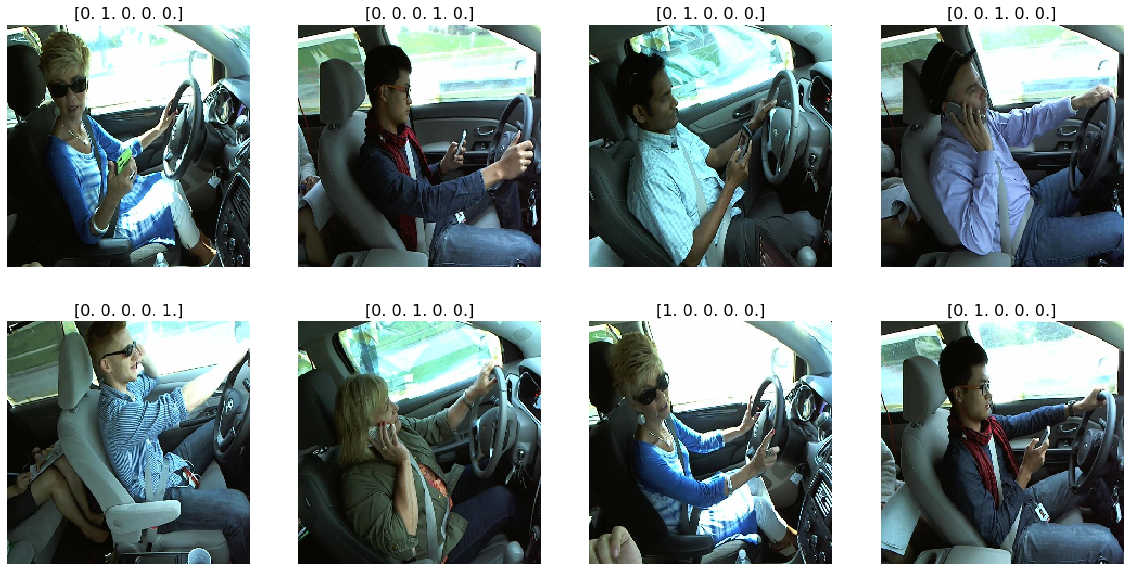

In [0]:
batches = get_batches(train_path, batch_size=8)
imgs,labels = next(batches)
# Plot randomly 8 images
plots(imgs, titles=labels, figsize=(20,10), rows =2)

## 1.3 Batches preparation

### Batches as direct inputs

<span style="color:red"> WARNING: These lines are only to run once

In [0]:
# Roll into pixcel matrix
train_data = get_data(train_path)
valid_data = get_data(valid_path)

Found 9745 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [0]:
save_array('/content/state-farm-distracted-driver-detection/results/train_data.dat', train_data)
save_array('/content/state-farm-distracted-driver-detection/results/valid_data.dat', valid_data)

<span style="color:red">End  WARNING </span>

Loading labels and stored data.

In [0]:
(valid_classes, train_classes, valid_labels, train_labels, valid_filenames, train_filenames) = get_classes(train_path,valid_path)

Found 9745 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


## 1.3 Summary


# 2. Experiements

We will start with the simpliest model: a fully connected network with no hidden layer, i.e., linear model. This is to provide a benchmark for subsequence development.

Notes:

- We used  batchnormalization right at the input layer to avoid any domination input values that could skew the output.
- We activated the output with a softmax layer for 10 classes.
- We will 224x224 input shape, as the results we will have 1.5+ million parametters and easily overfitted with a linear model, hence, l2 regularization is used to minimize impact of overfitting.

## 2.1 Linear model

In [0]:
Linear_model = keras.Sequential([
        keras.layers.BatchNormalization (axis=-1, input_shape=(224,224,3)),
        keras.layers.Flatten(),
        keras.layers.Dense(5, activation='softmax')
    ])

Linear_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Linear_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
flatten_5 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 752645    
Total params: 752,657
Trainable params: 752,651
Non-trainable params: 6
_________________________________________________________________


Training 5 epochs.

In [0]:
batch_size=32
Ex1_history = Linear_model.fit(train_data,train_labels, batch_size=batch_size, epochs=5,
                               validation_data =(valid_data,valid_labels))

Epoch 1/5
305/305 [==============================] - 89s 290ms/step - loss: 6.3217 - accuracy: 0.7967 - val_loss: 0.6219 - val_accuracy: 0.9590
Epoch 2/5
305/305 [==============================] - 88s 289ms/step - loss: 1.0079 - accuracy: 0.9349 - val_loss: 0.9987 - val_accuracy: 0.9455
Epoch 3/5
305/305 [==============================] - 88s 289ms/step - loss: 0.9689 - accuracy: 0.9495 - val_loss: 0.3958 - val_accuracy: 0.9755
Epoch 4/5
305/305 [==============================] - 88s 289ms/step - loss: 0.3979 - accuracy: 0.9740 - val_loss: 0.4185 - val_accuracy: 0.9795
Epoch 5/5
305/305 [==============================] - 88s 289ms/step - loss: 0.6117 - accuracy: 0.9646 - val_loss: 2.0969 - val_accuracy: 0.9220


It can be seen that the linear model with batchnormalization and some l2 regulation actually work pretty well. We can achive validation accuracy of around 96% on the validation dataset. However, the validation accuracy is not stable (even training accuracy is not stable), it means that model will not generalize very well but for starting model, this is very encouraging and it is clearly much better than random guess. 

Next we will try to stablize the validation accuracy with convolutional networks.

## 2.2 Simple convolutional layer network

Next, we experiment a neural network with 2 convolutional layers. This experiment will give us an idea on how this dataset behave under convolutional actions. We will try to overfitting and later adding some regularization or data augmentation.

In [0]:
CNN_simple = keras.Sequential([
             keras.layers.BatchNormalization(input_shape=(224,224,3)),
            keras.layers.Conv2D(32,(3,3), activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3,3)),
            keras.layers.Conv2D(64,(3,3), activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPooling2D((3,3)),
            keras.layers.Flatten(),
            keras.layers.Dense(200, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(5, activation='softmax')
        ])

CNN_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
CNN_simple.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_8 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)       

In [0]:
batch_size=32
Ex2_history = CNN_simple.fit(train_data,train_labels, batch_size=batch_size, epochs=5, 
                             validation_data =(valid_data,valid_labels))

Epoch 1/5
305/305 [==============================] - 727s 2s/step - loss: 0.2512 - accuracy: 0.9348 - val_loss: 1.0072 - val_accuracy: 0.7180
Epoch 2/5
305/305 [==============================] - 729s 2s/step - loss: 0.0188 - accuracy: 0.9967 - val_loss: 0.0198 - val_accuracy: 0.9960
Epoch 3/5
305/305 [==============================] - 727s 2s/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.0069 - val_accuracy: 0.9980
Epoch 4/5
305/305 [==============================] - 729s 2s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9975
Epoch 5/5
305/305 [==============================] - 733s 2s/step - loss: 0.0268 - accuracy: 0.9943 - val_loss: 0.0173 - val_accuracy: 0.9960


*With* 5 epochs, we are able to get to 99% accuracy, however, we are slightly overfitting the model, we will add some reularization or specifically dropout to see if we can stablize the accuracy reading a bit more.